In [2]:
#
# libraries
#
import pandas as pd
import matplotlib.pyplot as plt
#

In [3]:
#
# load stock data (time series)
#
stock_data = pd.read_csv('Datasets\\spx.csv')
#
stock_data.date = pd.to_datetime(stock_data.date)
stock_data.head()
#

,date,close
0,1986-01-02,209.59
1,1986-01-03,210.88
2,1986-01-06,210.65
3,1986-01-07,213.80
4,1986-01-08,207.97


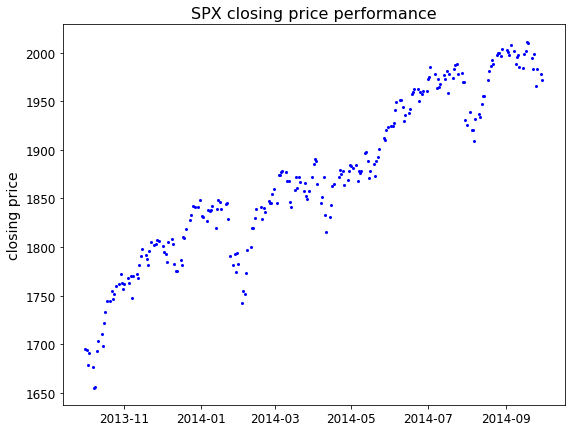

In [4]:
#
# visualize the data
#
subset = stock_data.loc[(stock_data.date > '2013-09-30') &
                       (stock_data.date < '2014-10-01'), :]
fig, ax = plt.subplots(figsize = (9, 7))
ax.scatter(subset.date, subset.close, 
        color = 'blue', s = 4)
ax.set_title('SPX closing price performance', fontsize = 16)
ax.set_ylabel('closing price', fontsize = 14)
ax.tick_params(labelsize = 12)
plt.show()
#

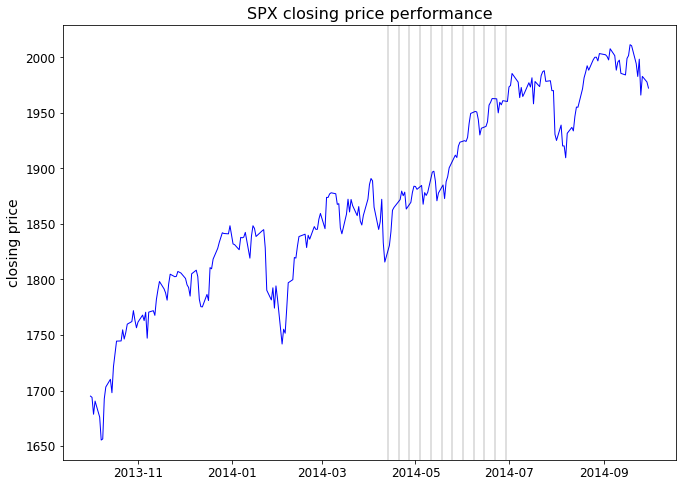

In [5]:
#
# compare to a line plot
#
subset = stock_data.loc[(stock_data.date > '2013-09-30') &
                       (stock_data.date < '2014-10-01'), :]
fig, ax = plt.subplots(figsize = (11, 8))
ax.plot(subset.date, subset.close, 
        color = 'blue', lw = 1)
ax.set_title('SPX closing price performance', fontsize = 16)
ax.set_ylabel('closing price', fontsize = 14)
ax.tick_params(labelsize = 12)
for date in pd.date_range('2014-04-13', periods = 12, freq = '1W'):
    ax.axvline(date, ymin = 0, ymax = 1, color = 'black', lw = 0.25)
plt.show()
#

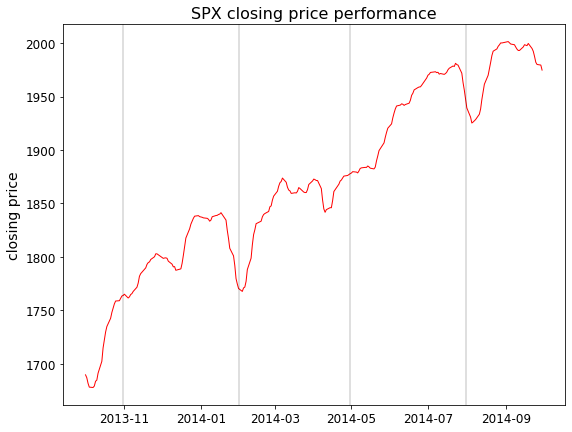

In [71]:
#
# use .rolling() method to smooth the data 
#
subset_smooth = subset['close'].rolling(window = 7, 
                                        min_periods = 0, 
                                        center = True).mean()
#
fig, ax = plt.subplots(figsize = (9, 7))
ax.plot(subset.date, subset_smooth, 
        color = 'red',
        lw = 1)
ax.set_title('SPX closing price performance', fontsize = 16)
ax.set_ylabel('closing price', fontsize = 14)
ax.tick_params(labelsize = 12)
for date in pd.date_range('2013-10-31', periods = 4, freq= '3M'):
    ax.axvline(date, ymin = 0, ymax = 1, color = 'black', lw = 0.25)
plt.show()
#